In [14]:
import pandas as pd

In [24]:
pd.__version__

'2.0.3'

In [9]:
b_dataframe = pd.read_csv("C:/Users/Christopher/Documents/reconv/Le Wagon/Intro to python/nyc-east-river-bicycle-counts.csv")

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
b_dataframe.shape

(214, 9)

In [17]:
b_dataframe.drop("Day", axis="columns", inplace=True)

In [19]:
b_dataframe["Precipitation"] = b_dataframe["Precipitation"].str.replace("\(S\)", "", regex=True)

In [22]:
b_dataframe["Precipitation"] = b_dataframe["Precipitation"].str.replace(r"\bT\b", "0.01",regex=True)

In [23]:
precipitation_to_float = ["Precipitation"]
b_dataframe[precipitation_to_float] = b_dataframe[precipitation_to_float].astype(float)

In [26]:
b_dataframe.replace(",", "", regex=True, inplace=True)

In [27]:
objects_to_int = ["Brooklyn Bridge", "Manhattan Bridge", "Williamsburg Bridge", "Queensboro Bridge", "Total"]
b_dataframe[objects_to_int] = b_dataframe[objects_to_int].astype(int)

In [29]:
b_dataframe.dtypes

Date                    object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation          float64
Brooklyn Bridge          int32
Manhattan Bridge         int32
Williamsburg Bridge      int32
Queensboro Bridge        int32
Total                    int32
dtype: object

In [33]:
b_dataframe.nsmallest(5, 'Total')

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
3,4-Apr,44.1,33.1,0.47,521,1067,1440,1307,4335
8,9-Apr,43.0,37.9,0.09,504,997,1507,1502,4510
2,3-Apr,39.9,34.0,0.09,526,1232,1695,1306,4759
191,9-Oct,57.9,51.1,0.55,621,1173,2045,1439,5278
204,22-Oct,50.0,46.9,0.29,544,1254,2108,1517,5423


In [36]:
b_dataframe.nlargest(5, 'Total')

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
102,12-Jul,82.4,69.8,0.0,5152,7745,9148,6392,28437
165,13-Sep,82.0,64.9,0.0,3783,9152,8972,6315,28222
103,13-Jul,82.9,73.0,0.0,5885,6926,8564,6204,27579
54,25-May,87.1,64.0,0.0,4244,7869,8959,5906,26978
124,3-Aug,78.1,66.9,0.0,4753,7297,8605,6295,26950


In [55]:
b_dataframe['Date'] = b_dataframe['Date'].apply(lambda x: datetime.strptime(x, "%d-%b"))

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))

<Figure size 1000x2000 with 0 Axes>

<Figure size 1000x2000 with 0 Axes>

<Axes: xlabel='Date', ylabel='Total'>

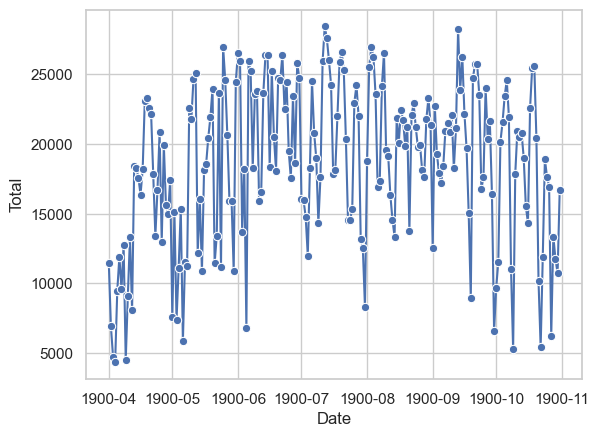

In [65]:
sns.lineplot(x='Date', y='Total', data=b_dataframe, marker='o')

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


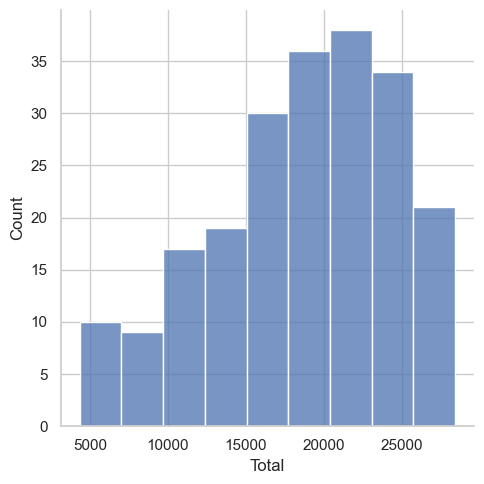

In [69]:

sns.displot(b_dataframe["Total"])

In [70]:
b_dataframe["Total"].mean()

18544.532710280375